# Baseline Performance

The baseline performance is compared using the following features from the different first stage feature selection technique. 
1. Mutual Information with Threshold of 0.01
2. Mutual Information with Threshold of 0.001
3. Chi-Square

In [ ]:
import os
import sys
# you may not need to run this cell, you can just run the next cell
# Set environment variable for all subprocesses
os.environ["PYTHONPATH"] = "/mnt/storage/faithfulco/python_packages"

# Add to current interpreter path
sys.path.insert(0, "/mnt/storage/faithfulco/python_packages")

In [ ]:
# libraries
import os
import sys
import pandas as pd
import numpy as np
import json
from tqdm import tqdm  # Import tqdm for the progress bar
import pickle
import time  # Import time to track duration
import fastparquet
import pyarrow

## IDS to remove

In [3]:
sample_ids_to_remove = [11898, 11899, 12057, 12107]
sample_ids_to_remove

[11898, 11899, 12057, 12107]

## Import datasets from feature selection

In [4]:
df_labels = pd.read_csv('FS_MLRan_Datasets/MLRan_labels.csv') 
print("Shape of the data:", df_labels.shape)
display(df_labels.head())

Shape of the data: (4880, 4)


,sample_id,sample_type,family_label,type_label
0,10001,1,3,2
1,10002,1,12,2
2,10003,1,3,2
3,10004,1,9,1
4,10005,1,11,1


In [5]:
train_sampleids = pd.read_csv('FS_MLRan_Datasets/type_train_sampleids.csv')
print(train_sampleids.shape)
train_sampleids.head()

(3905, 1)


,sample_id
0,15141
1,13905
2,14531
3,14502
4,15584


In [6]:
test_sampleids = pd.read_csv('FS_MLRan_Datasets/type_test_sampleids.csv')
print(test_sampleids.shape)
test_sampleids.head()

(975, 1)


,sample_id
0,13541
1,14058
2,13941
3,13749
4,14097


In [7]:
df_labels_train = df_labels[df_labels['sample_id'].isin(train_sampleids['sample_id'])]
print(df_labels_train.shape)
df_labels_train.head()

(3905, 4)


,sample_id,sample_type,family_label,type_label
0,10001,1,3,2
1,10002,1,12,2
2,10003,1,3,2
3,10004,1,9,1
4,10005,1,11,1


In [8]:
df_labels_test = df_labels[df_labels['sample_id'].isin(test_sampleids['sample_id'])]
print(df_labels_test.shape)
df_labels_test.head()

(975, 4)


,sample_id,sample_type,family_label,type_label
979,11027,1,8,1
982,11030,1,31,2
985,11033,1,8,1
987,11035,1,8,1
988,11036,1,3,2


### Mutual Information with Threshold of 0.01

In [8]:
X_train_m1 = pd.read_parquet('FS_MLRan_Datasets/MLRan_X_train_MI_01.parquet', engine='fastparquet')  # or 'fastparquet'
print(X_train_m1.shape)
display(X_train_m1.head())

(3905, 24163)


,sample_id,1,2,4,5,8,10,16,18,19,...,6468225,6468226,6468229,6468230,6468242,6468252,6468253,6468256,6468258,6468260
0,10001,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10003,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,10004,0,0,1,1,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4,10005,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,1


In [9]:
X_test_m1 = pd.read_parquet('FS_MLRan_Datasets/MLRan_X_test_MI_01.parquet', engine='fastparquet')  # or 'fastparquet'
print(X_test_m1.shape)
display(X_test_m1.head())

(975, 24163)


,sample_id,1,2,4,5,8,10,16,18,19,...,6468225,6468226,6468229,6468230,6468242,6468252,6468253,6468256,6468258,6468260
0,11027,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,11030,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,11033,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,11035,0,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,11036,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train_merge_m1 = pd.merge(df_labels_train, X_train_m1, on='sample_id')
print(X_train_merge_m1.shape)
display(X_train_merge_m1.head())
display(X_train_merge_m1.tail())

(3905, 24166)


,sample_id,sample_type,family_label,type_label,1,2,4,5,8,10,...,6468225,6468226,6468229,6468230,6468242,6468252,6468253,6468256,6468258,6468260
0,10001,1,3,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,12,2,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,10003,1,3,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,10004,1,9,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,10005,1,11,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1


,sample_id,sample_type,family_label,type_label,1,2,4,5,8,10,...,6468225,6468226,6468229,6468230,6468242,6468252,6468253,6468256,6468258,6468260
3900,15691,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3901,15692,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3902,15693,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3903,15694,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3904,15695,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test_merge_m1 = pd.merge(df_labels_test, X_test_m1, on='sample_id')
print(X_test_merge_m1.shape)
display(X_test_merge_m1.head())
display(X_test_merge_m1.tail())

(975, 24166)


,sample_id,sample_type,family_label,type_label,1,2,4,5,8,10,...,6468225,6468226,6468229,6468230,6468242,6468252,6468253,6468256,6468258,6468260
0,11027,1,8,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,11030,1,31,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11033,1,8,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,11035,1,8,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,11036,1,3,2,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


,sample_id,sample_type,family_label,type_label,1,2,4,5,8,10,...,6468225,6468226,6468229,6468230,6468242,6468252,6468253,6468256,6468258,6468260
970,15644,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
971,15657,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
972,15661,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
973,15673,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
974,15681,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Mutual Information with Threshold of 0.001

In [18]:
X_train_m2 = pd.read_parquet('FS_MLRan_Datasets/MLRan_X_train_MI_001.parquet', engine='fastparquet')  # or 'fastparquet'
print(X_train_m2.shape)
display(X_train_m2.head())

(3905, 126629)


,sample_id,1,2,3,4,5,6,7,8,9,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,10001,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,10002,0,0,1,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,10003,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10004,0,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,10005,0,0,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0


In [19]:
X_test_m2 = pd.read_parquet('FS_MLRan_Datasets/MLRan_X_test_MI_001.parquet', engine='fastparquet')  # or 'fastparquet'
print(X_test_m2.shape)
display(X_test_m2.head())

(975, 126629)


,sample_id,1,2,3,4,5,6,7,8,9,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,11027,0,0,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
1,11030,0,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,11033,0,0,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
3,11035,0,0,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
4,11036,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_train_merge_m2 = pd.merge(df_labels_train, X_train_m2, on='sample_id')
print(X_train_merge_m2.shape)
display(X_train_merge_m2.head())
display(X_train_merge_m2.tail())

(3905, 126632)


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,6,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,10001,1,3,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,10002,1,12,2,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,10003,1,3,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,1,9,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,10005,1,11,1,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,6,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
3900,15691,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3901,15692,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3902,15693,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3903,15694,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3904,15695,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_test_merge_m2 = pd.merge(df_labels_test, X_test_m2, on='sample_id')
print(X_test_merge_m2.shape)
display(X_test_merge_m2.head())
display(X_test_merge_m2.tail())

(975, 126632)


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,6,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,11027,1,8,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
1,11030,1,31,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,11033,1,8,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
3,11035,1,8,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
4,11036,1,3,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,6,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
970,15644,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
971,15657,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
972,15661,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
973,15673,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
974,15681,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Chi-square

In [9]:
X_train_chi = pd.read_parquet('FS_MLRan_Datasets/MLRan_X_train_Chi.parquet', engine='fastparquet')  # or 'fastparquet'
print(X_train_chi.shape)
display(X_train_chi.head())

(3907, 1062252)


,sample_id,1,2,3,4,5,7,8,9,10,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,10001,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,10002,0,0,1,0,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,10003,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,10005,0,0,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0


In [10]:
X_test_chi = pd.read_parquet('FS_MLRan_Datasets/MLRan_X_test_Chi.parquet', engine='fastparquet')  # or 'fastparquet'
print(X_test_chi.shape)
display(X_test_chi.head())

(977, 1062252)


,sample_id,1,2,3,4,5,7,8,9,10,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,11027,0,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,11030,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11033,0,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,11035,0,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
4,11036,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train_merge_chi = pd.merge(df_labels_train, X_train_chi, on='sample_id')
print(X_train_merge_chi.shape)
display(X_train_merge_chi.head())
display(X_train_merge_chi.tail())

(3905, 1062255)


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,7,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,10001,1,3,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,10002,1,12,2,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,10003,1,3,2,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10004,1,9,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,10005,1,11,1,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,7,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
3900,15691,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3901,15692,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3902,15693,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3903,15694,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3904,15695,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_test_merge_chi = pd.merge(df_labels_test, X_test_chi, on='sample_id')
print(X_test_merge_chi.shape)
display(X_test_merge_chi.head())
display(X_test_merge_chi.tail())

(975, 1062255)


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,7,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
0,11027,1,8,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
1,11030,1,31,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,11033,1,8,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
3,11035,1,8,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
4,11036,1,3,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


,sample_id,sample_type,family_label,type_label,1,2,3,4,5,7,...,6468255,6468256,6468258,6468260,6468261,6468264,6468266,6468267,6468269,6468270
970,15644,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
971,15657,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
972,15661,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
973,15673,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
974,15681,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Function for ML

In [ ]:
# Libraries for the pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

# Preprocessing step to clean and prepare the data
def preprocess_data(X_train_merge, X_test_merge, label_column, is_multiclass=False):
    # Drop metadata columns and preserve feature names
    X_train = X_train_merge.drop(columns=['sample_id', 'sample_type', 'family_label', 'type_label'])
    y_train = X_train_merge[label_column].to_numpy()

    X_test = X_test_merge.drop(columns=['sample_id', 'sample_type', 'family_label', 'type_label'])
    y_test = X_test_merge[label_column].to_numpy()

    return X_train, y_train, X_test, y_test, None

# Retrieve list of models to train depending on classification type

def get_models(is_multiclass):
    common_params = {'n_jobs': -1}
    if is_multiclass:
        return [
            (LGBMClassifier(objective='multiclass', verbose=0, min_child_samples=10,
    min_split_gain=0, **common_params), "LightGBM"),
            (DecisionTreeClassifier(), "Decision Tree"),
            (LogisticRegression(max_iter=1000, verbose=0), "Logistic Regression"),
            (RandomForestClassifier(verbose=0), "Random Forest"),
            (ExtraTreesClassifier(verbose=0, **common_params), "Extra Trees")
        ]
    else:
        return [
            (LGBMClassifier(objective='binary', verbose=0, min_child_samples=10,
    min_split_gain=0, **common_params), "LightGBM"),
            (DecisionTreeClassifier(), "Decision Tree"),
            (LogisticRegression(max_iter=1000, verbose=0), "Logistic Regression"),
            (RandomForestClassifier(verbose=0), "Random Forest"),
            (ExtraTreesClassifier(verbose=0, **common_params), "Extra Trees")
        ]

# Define hyperparameter search grids for each model

def get_hyperparameter_grid(model_name, is_multiclass):
    if model_name == "LightGBM":
        return {
            'num_leaves': [15, 31],
            'n_estimators': [50, 100],
            'learning_rate': [0.01]
        }
    elif model_name == "Decision Tree":
        return {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    elif model_name == "Logistic Regression":
        return {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs'] if is_multiclass else ['liblinear']
        }
    elif model_name == "Random Forest":
        return {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    elif model_name == "Extra Trees":
        return {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    else:
        return {}

# Function to train and evaluate a single model

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, is_multiclass):
    print(f"Starting training for {model_name}...")

    param_grid = get_hyperparameter_grid(model_name, is_multiclass)
    if param_grid:
        print(f"Starting hyperparameter tuning for {model_name}...")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='f1_weighted' if is_multiclass else 'roc_auc',
            cv=3, n_jobs=-1, verbose=0
        )
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Completed hyperparameter tuning for {model_name}.")
    else:
        print(f"Training {model_name} without hyperparameter tuning...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        best_model = model
        best_params = {}

    print(f"{model_name} training completed.")
    training_time = end_time - start_time

    print(f"Starting prediction for {model_name}...")
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

    if is_multiclass and y_prob is not None:
        y_prob_aligned = np.zeros((y_prob.shape[0], len(np.unique(np.concatenate((y_train, y_test))))))
        for i, cls in enumerate(np.unique(y_train)):
            y_prob_aligned[:, cls] = y_prob[:, i]
        y_prob = y_prob_aligned

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    if is_multiclass and y_prob is not None:
        try:
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
        except ValueError:
            roc_auc = None
    elif y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        roc_auc = None

    print(f"Classification Report - {model_name}:\n{classification_report(y_test, y_pred)}")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]}", ha="center", va="center", color="black")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Display ROC curve for binary classification
    if y_prob is not None and not is_multiclass:
        RocCurveDisplay.from_predictions(y_test, y_prob[:, 1])
        plt.title(f"ROC Curve - {model_name}")
        plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Training Time (s)": training_time,
        "Best Hyperparameters": best_params
    }

# Function to iterate over all models

def train_and_evaluate_models(X_train, y_train, X_test, y_test, label_column):
    is_multiclass = label_column in ["type_label", "family_label"]
    models = get_models(is_multiclass)
    metrics_list = []

    for model, name in models:
        print("="*60)
        metrics = evaluate_model(model, X_train, y_train, X_test, y_test, name, is_multiclass)
        metrics_list.append(metrics)

    metrics_df = pd.DataFrame(metrics_list).round(4)
    print("Metrics DataFrame:")
    display(metrics_df)
    if is_multiclass:
        metrics_df['Label Mapping'] = str(dict(enumerate(np.unique(y_train))))
    metrics_df['Best Hyperparameters'] = metrics_df['Best Hyperparameters'].apply(lambda x: str(x))
    return metrics_df

# Main function to run the pipeline

def main(X_train_merge, X_test_merge, label_column):
    print("Starting preprocessing...")
    is_multiclass = label_column in ["type_label", "family_label"]

    X_train, y_train, X_test, y_test, label_encoder = preprocess_data(
        X_train_merge, X_test_merge, label_column, is_multiclass
    )

    print("Preprocessing complete. Beginning model training and evaluation...")
    metrics_df = train_and_evaluate_models(X_train, y_train, X_test, y_test, label_column)
    print("Model Performance Metrics:")
    display(metrics_df)
    return metrics_df


/mnt/storage/faithfulco/python_packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


: 

## Binary classification (goodware vs ransomware)

### MI with Th=0.01

Starting preprocessing...
Preprocessing complete. Beginning model training and evaluation...
Starting training for LightGBM...
Starting hyperparameter tuning for LightGBM...
Completed hyperparameter tuning for LightGBM.
LightGBM training completed.
Starting prediction for LightGBM...
Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       510
           1       0.93      0.94      0.94       465

    accuracy                           0.94       975
   macro avg       0.94      0.94      0.94       975
weighted avg       0.94      0.94      0.94       975



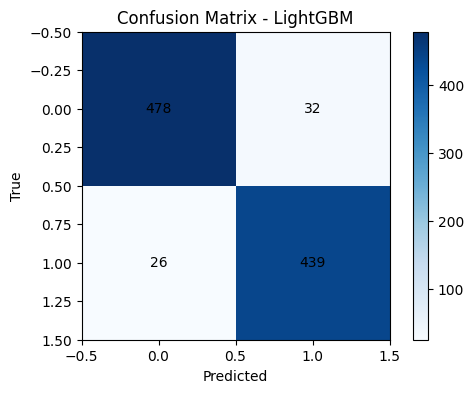

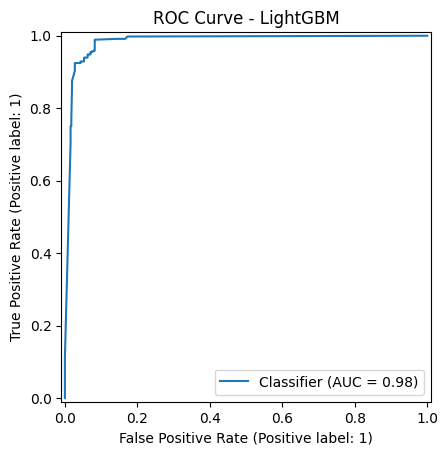

Starting training for Decision Tree...
Starting hyperparameter tuning for Decision Tree...
Completed hyperparameter tuning for Decision Tree.
Decision Tree training completed.
Starting prediction for Decision Tree...
Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       510
           1       0.96      0.99      0.97       465

    accuracy                           0.98       975
   macro avg       0.98      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975



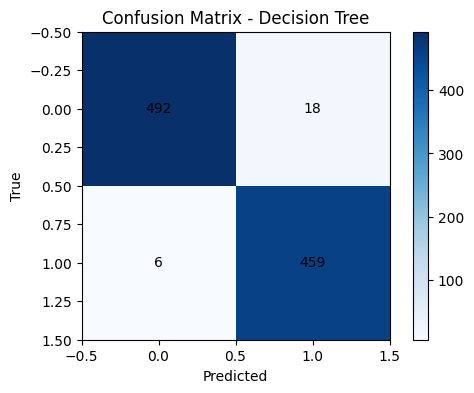

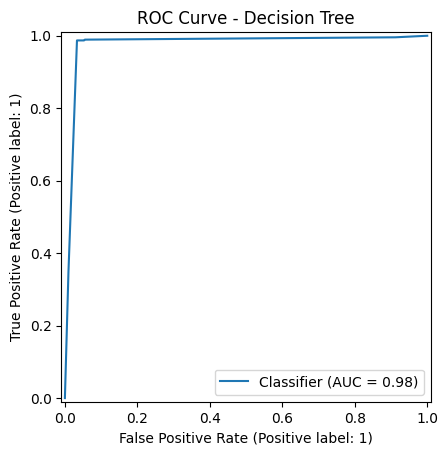

Starting training for Logistic Regression...
Starting hyperparameter tuning for Logistic Regression...
Completed hyperparameter tuning for Logistic Regression.
Logistic Regression training completed.
Starting prediction for Logistic Regression...
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       510
           1       0.96      0.99      0.97       465

    accuracy                           0.98       975
   macro avg       0.98      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975



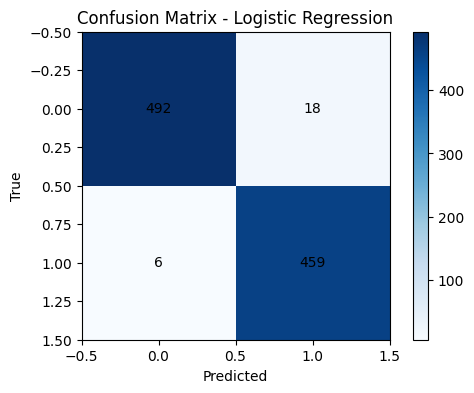

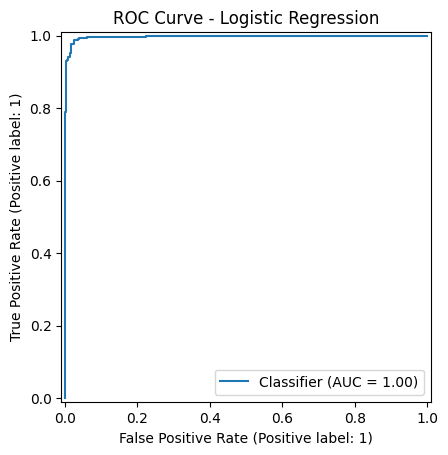

Starting training for Random Forest...
Starting hyperparameter tuning for Random Forest...
Completed hyperparameter tuning for Random Forest.
Random Forest training completed.
Starting prediction for Random Forest...
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       510
           1       0.95      0.99      0.97       465

    accuracy                           0.97       975
   macro avg       0.97      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975



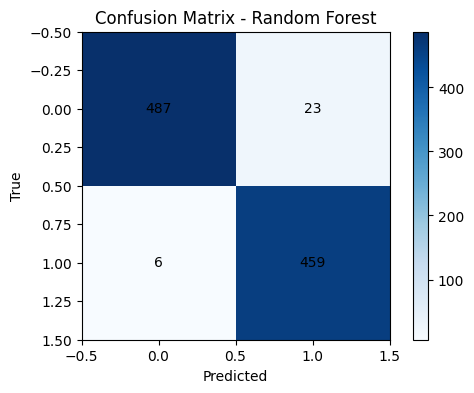

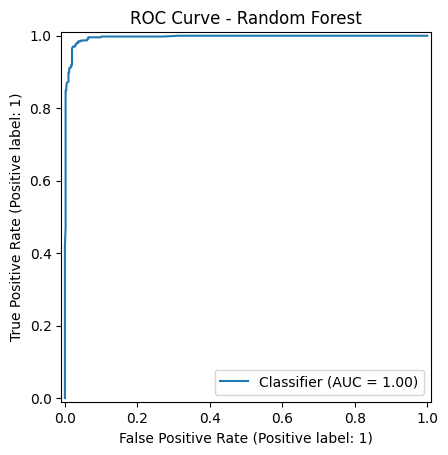

Starting training for Extra Trees...
Starting hyperparameter tuning for Extra Trees...
Completed hyperparameter tuning for Extra Trees.
Extra Trees training completed.
Starting prediction for Extra Trees...
Classification Report - Extra Trees:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       510
           1       0.96      0.98      0.97       465

    accuracy                           0.97       975
   macro avg       0.97      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975



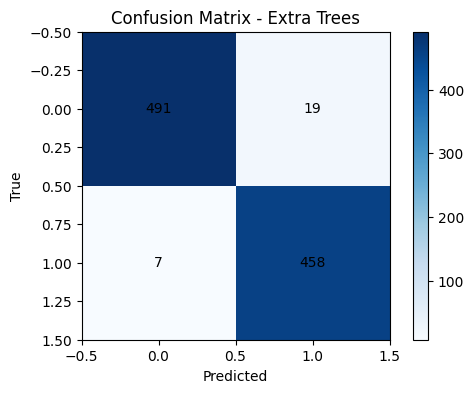

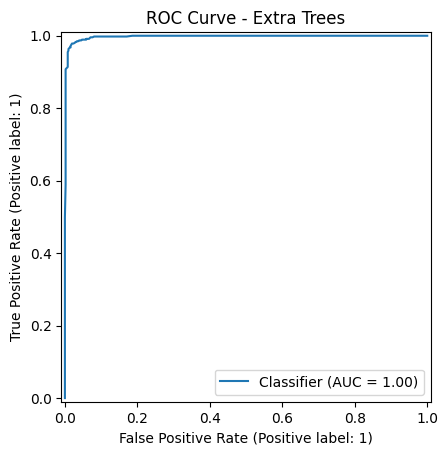

Model Performance Metrics:


,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time (s),Best Hyperparameters
0,LightGBM,0.9405,0.9407,0.9406,0.9405,0.9405,0.9839,7876.1078,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
1,Decision Tree,0.9754,0.9759,0.9757,0.9754,0.9754,0.9772,10.7591,"{'max_depth': 10, 'min_samples_split': 10}"
2,Logistic Regression,0.9754,0.9759,0.9757,0.9754,0.9754,0.9975,4.7536,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"
3,Random Forest,0.9703,0.9710,0.9709,0.9703,0.9703,0.9956,13.4085,"{'max_depth': None, 'min_samples_split': 2, 'n..."
4,Extra Trees,0.9733,0.9738,0.9737,0.9733,0.9733,0.9973,4.9794,"{'max_depth': None, 'min_samples_split': 2, 'n..."


In [16]:
metrics_df_sample_m1 = main(X_train_merge_m1, X_test_merge_m1, label_column="sample_type")

In [ ]:
display(metrics_df_sample_m1)
#metrics_df_sample_m1.to_csv('outputs/1_baseline/bin_class_stage1_MI_01.csv', index=False)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time (s),Best Hyperparameters
0,LightGBM,0.9405,0.9407,0.9406,0.9405,0.9405,0.9839,7876.1078,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
1,Decision Tree,0.9754,0.9759,0.9757,0.9754,0.9754,0.9772,10.7591,"{'max_depth': 10, 'min_samples_split': 10}"
2,Logistic Regression,0.9754,0.9759,0.9757,0.9754,0.9754,0.9975,4.7536,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"
3,Random Forest,0.9703,0.9710,0.9709,0.9703,0.9703,0.9956,13.4085,"{'max_depth': None, 'min_samples_split': 2, 'n..."
4,Extra Trees,0.9733,0.9738,0.9737,0.9733,0.9733,0.9973,4.9794,"{'max_depth': None, 'min_samples_split': 2, 'n..."


### MI with Th=0.001

Starting preprocessing...
Preprocessing complete. Beginning model training and evaluation...
Starting training for LightGBM...
Starting hyperparameter tuning for LightGBM...
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Completed hyperparameter tuning for LightGBM.
LightGBM training completed.
Starting prediction for LightGBM...
Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       510
           1       0.94      0.94      0.94       465

    accuracy                           0.95       975
   macro avg       0.95      0.95      0.95       975
weighted avg       0.95      0.95      0.95       975



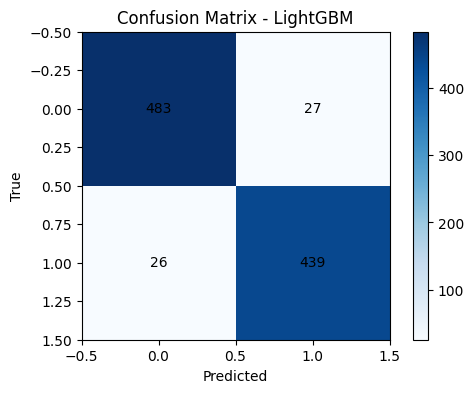

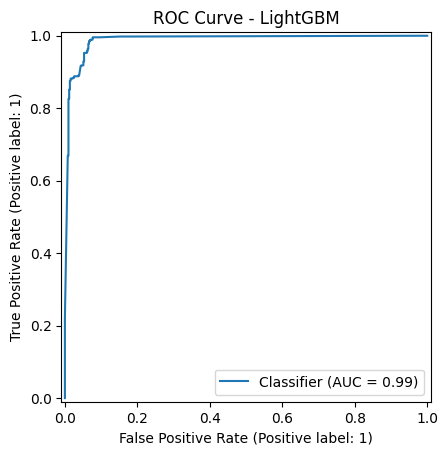

Starting training for Decision Tree...
Starting hyperparameter tuning for Decision Tree...
Completed hyperparameter tuning for Decision Tree.
Decision Tree training completed.
Starting prediction for Decision Tree...
Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       510
           1       0.95      0.98      0.97       465

    accuracy                           0.97       975
   macro avg       0.97      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975



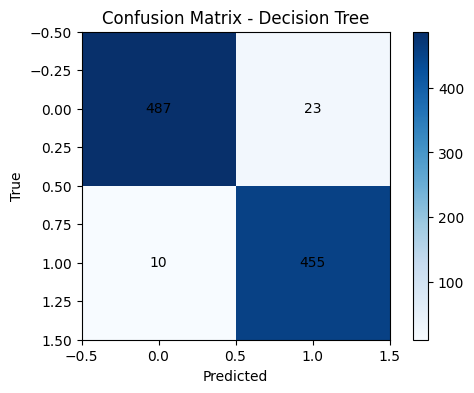

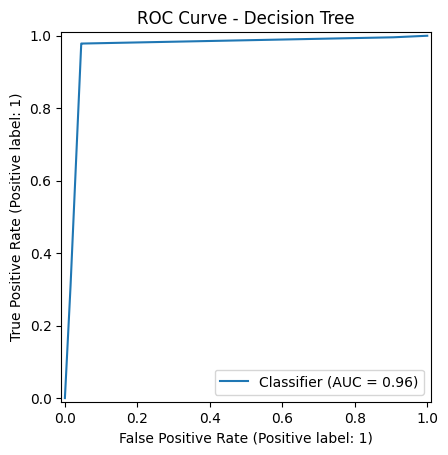

Starting training for Logistic Regression...
Starting hyperparameter tuning for Logistic Regression...
Completed hyperparameter tuning for Logistic Regression.
Logistic Regression training completed.
Starting prediction for Logistic Regression...
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       510
           1       0.97      0.99      0.98       465

    accuracy                           0.98       975
   macro avg       0.98      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975



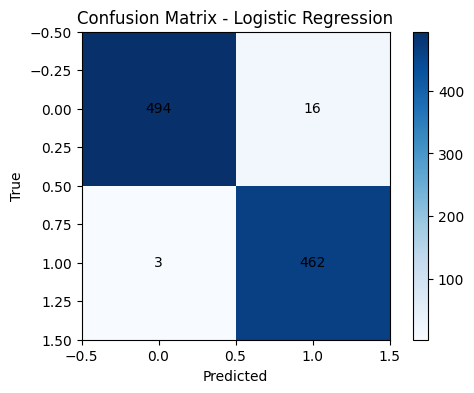

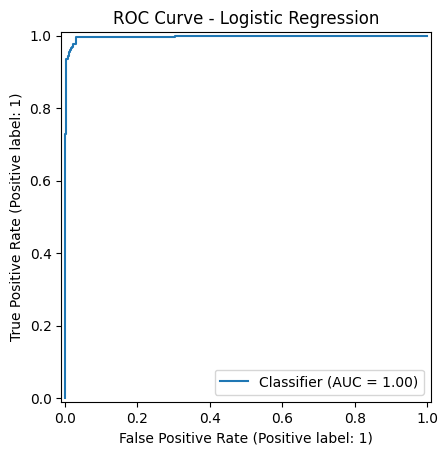

Starting training for Random Forest...
Starting hyperparameter tuning for Random Forest...
Completed hyperparameter tuning for Random Forest.
Random Forest training completed.
Starting prediction for Random Forest...
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       510
           1       0.95      0.99      0.97       465

    accuracy                           0.97       975
   macro avg       0.97      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975



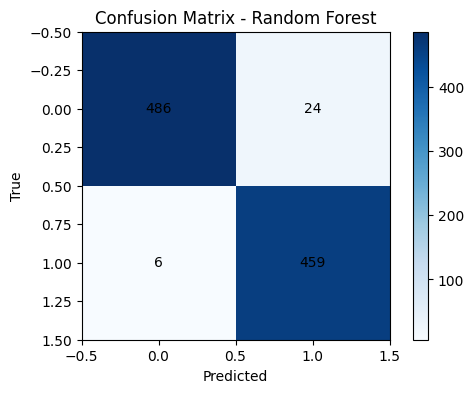

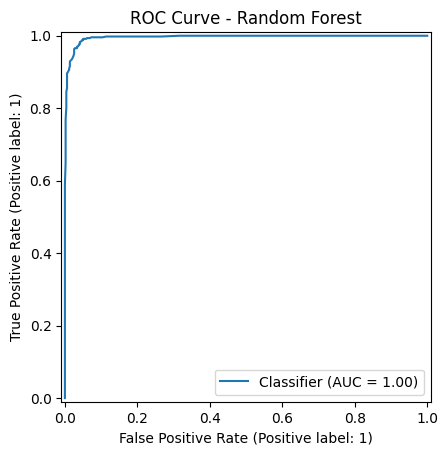

Starting training for Extra Trees...
Starting hyperparameter tuning for Extra Trees...
Completed hyperparameter tuning for Extra Trees.
Extra Trees training completed.
Starting prediction for Extra Trees...
Classification Report - Extra Trees:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       510
           1       0.95      0.98      0.97       465

    accuracy                           0.97       975
   macro avg       0.97      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975



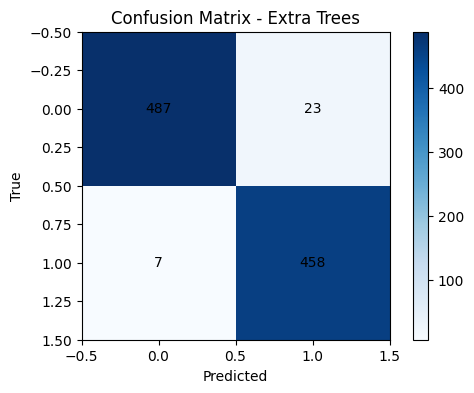

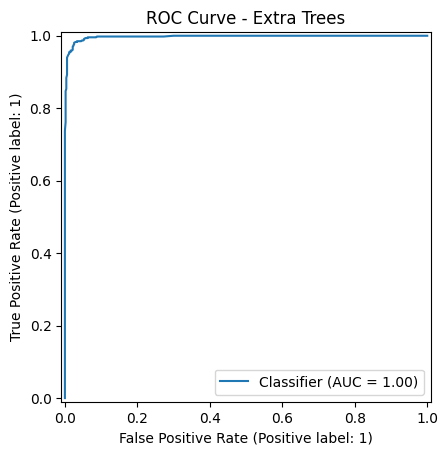

Model Performance Metrics:


,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time (s),Best Hyperparameters
0,LightGBM,0.9456,0.9456,0.9456,0.9456,0.9456,0.9884,24797.1075,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
1,Decision Tree,0.9662,0.9667,0.9665,0.9662,0.9662,0.9650,50.8895,"{'max_depth': 20, 'min_samples_split': 5}"
2,Logistic Regression,0.9805,0.9811,0.9809,0.9805,0.9805,0.9974,19.9702,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."
3,Random Forest,0.9692,0.9700,0.9699,0.9692,0.9692,0.9957,37.4028,"{'max_depth': None, 'min_samples_split': 2, 'n..."
4,Extra Trees,0.9692,0.9699,0.9698,0.9692,0.9692,0.9971,20.6849,"{'max_depth': None, 'min_samples_split': 2, 'n..."


In [22]:
metrics_df_sample_m2 = main(X_train_merge_m2, X_test_merge_m2, label_column="sample_type")

In [23]:
display(metrics_df_sample_m2)
metrics_df_sample_m2.to_csv('outputs/1_baseline/bin_class_stage1_MI_001.csv', index=False)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time (s),Best Hyperparameters
0,LightGBM,0.9456,0.9456,0.9456,0.9456,0.9456,0.9884,24797.1075,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
1,Decision Tree,0.9662,0.9667,0.9665,0.9662,0.9662,0.9650,50.8895,"{'max_depth': 20, 'min_samples_split': 5}"
2,Logistic Regression,0.9805,0.9811,0.9809,0.9805,0.9805,0.9974,19.9702,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."
3,Random Forest,0.9692,0.9700,0.9699,0.9692,0.9692,0.9957,37.4028,"{'max_depth': None, 'min_samples_split': 2, 'n..."
4,Extra Trees,0.9692,0.9699,0.9698,0.9692,0.9692,0.9971,20.6849,"{'max_depth': None, 'min_samples_split': 2, 'n..."


### Chi-square

In [ ]:
# Libraries for the pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

# Preprocessing step to clean and prepare the data
def preprocess_data(X_train_merge, X_test_merge, label_column, is_multiclass=False):
    # Drop metadata columns and preserve feature names
    X_train = X_train_merge.drop(columns=['sample_id', 'sample_type', 'family_label', 'type_label'])
    y_train = X_train_merge[label_column].to_numpy()

    X_test = X_test_merge.drop(columns=['sample_id', 'sample_type', 'family_label', 'type_label'])
    y_test = X_test_merge[label_column].to_numpy()

    return X_train, y_train, X_test, y_test, None

# Retrieve list of models to train depending on classification type

def get_models(is_multiclass):
    common_params = {'n_jobs': -1}
    if is_multiclass:
        return [
            (LGBMClassifier(objective='multiclass', verbose=0, min_child_samples=10,
    min_split_gain=0, **common_params), "LightGBM"),
            (DecisionTreeClassifier(), "Decision Tree"),
            (LogisticRegression(max_iter=1000, verbose=0), "Logistic Regression"),
            (RandomForestClassifier(verbose=0), "Random Forest"),
            (ExtraTreesClassifier(verbose=0, **common_params), "Extra Trees")
        ]
    else:
        return [
            (LGBMClassifier(objective='binary', verbose=0, min_child_samples=10,
    min_split_gain=0, **common_params), "LightGBM"),
            (DecisionTreeClassifier(), "Decision Tree"),
            (LogisticRegression(max_iter=1000, verbose=0), "Logistic Regression"),
            (RandomForestClassifier(verbose=0), "Random Forest"),
            (ExtraTreesClassifier(verbose=0, **common_params), "Extra Trees")
        ]

# Define hyperparameter search grids for each model

def get_hyperparameter_grid(model_name, is_multiclass):
    if model_name == "LightGBM":
        return {
            'num_leaves': [15, 31],
            'n_estimators': [50, 100],
            'learning_rate': [0.01]
        }
    elif model_name == "Decision Tree":
        return {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    elif model_name == "Logistic Regression":
        return {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs'] if is_multiclass else ['liblinear']
        }
    elif model_name == "Random Forest":
        return {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    elif model_name == "Extra Trees":
        return {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    else:
        return {}

# Function to train and evaluate a single model

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, is_multiclass):
    print(f"Starting training for {model_name}...")

    param_grid = get_hyperparameter_grid(model_name, is_multiclass)
    if param_grid:
        print(f"Starting hyperparameter tuning for {model_name}...")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='f1_weighted' if is_multiclass else 'roc_auc',
            cv=3, n_jobs=-1, verbose=0
        )
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Completed hyperparameter tuning for {model_name}.")
    else:
        print(f"Training {model_name} without hyperparameter tuning...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        best_model = model
        best_params = {}

    print(f"{model_name} training completed.")
    training_time = end_time - start_time

    print(f"Starting prediction for {model_name}...")
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

    if is_multiclass and y_prob is not None:
        y_prob_aligned = np.zeros((y_prob.shape[0], len(np.unique(np.concatenate((y_train, y_test))))))
        for i, cls in enumerate(np.unique(y_train)):
            y_prob_aligned[:, cls] = y_prob[:, i]
        y_prob = y_prob_aligned

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    if is_multiclass and y_prob is not None:
        try:
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
        except ValueError:
            roc_auc = None
    elif y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        roc_auc = None


    print(f"Classification Report - {model_name}:\n{classification_report(y_test, y_pred)}")
    print("accuracy:", accuracy)
    print("balanced_accuracy:", balanced_accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1:", f1)
    print("roc_auc:", roc_auc)
    print("Training Time (s):", training_time)
    print("Best Hyperparameters:", best_params)

    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]}", ha="center", va="center", color="black")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Display ROC curve for binary classification
    if y_prob is not None and not is_multiclass:
        RocCurveDisplay.from_predictions(y_test, y_prob[:, 1])
        plt.title(f"ROC Curve - {model_name}")
        plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Training Time (s)": training_time,
        "Best Hyperparameters": best_params
    }

# Function to iterate over all models

def train_and_evaluate_models(X_train, y_train, X_test, y_test, label_column):
    is_multiclass = label_column in ["type_label", "family_label"]
    models = get_models(is_multiclass)
    metrics_list = []

    for model, name in models:
        print("="*60)
        metrics = evaluate_model(model, X_train, y_train, X_test, y_test, name, is_multiclass)
        metrics_list.append(metrics)

    metrics_df = pd.DataFrame(metrics_list).round(4)
    print("Metrics DataFrame:")
    display(metrics_df)
    if is_multiclass:
        metrics_df['Label Mapping'] = str(dict(enumerate(np.unique(y_train))))
    metrics_df['Best Hyperparameters'] = metrics_df['Best Hyperparameters'].apply(lambda x: str(x))
    return metrics_df

# Main function to run the pipeline

def main(X_train_merge, X_test_merge, label_column):
    print("Starting preprocessing...")
    is_multiclass = label_column in ["type_label", "family_label"]

    X_train, y_train, X_test, y_test, label_encoder = preprocess_data(
        X_train_merge, X_test_merge, label_column, is_multiclass
    )

    print("Preprocessing complete. Beginning model training and evaluation...")
    metrics_df = train_and_evaluate_models(X_train, y_train, X_test, y_test, label_column)
    print("Model Performance Metrics:")
    display(metrics_df)
    return metrics_df


/mnt/storage/faithfulco/python_packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


: 

Starting preprocessing...
Preprocessing complete. Beginning model training and evaluation...
Starting training for LightGBM...
Starting hyperparameter tuning for LightGBM...
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Completed hyperparameter tuning for LightGBM.
LightGBM training completed.
Starting prediction for LightGBM...
Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       510
           1       0.93      0.94      0.94       465

    accuracy                           0.94       975
   macro avg       0.94      0.94      0.94       975
weighted avg       0.94      0.94      0.94       975

accuracy: 0.9384615384615385
balanced_accuracy: 0.9385199240986717
precision: 0.9385144381899735
recall: 0.9384615384615385
f1: 0.9384721737652996
roc_auc: 0.9840860215053764
Training Time (s): 23017.7375

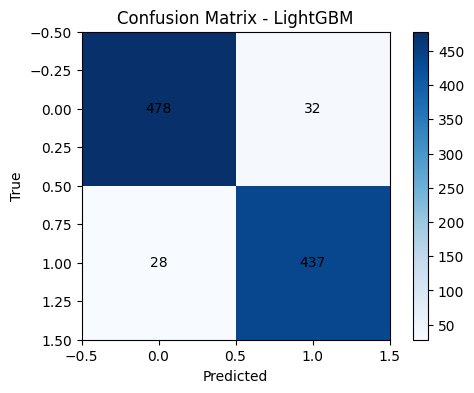

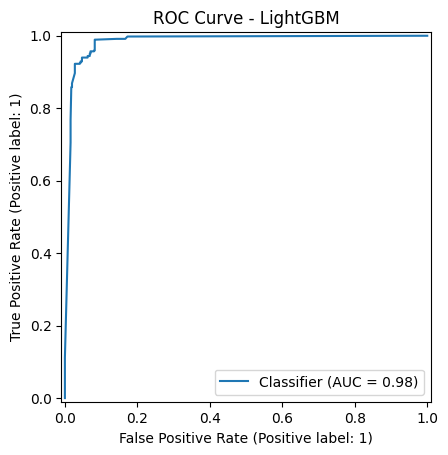

Starting training for Decision Tree...
Starting hyperparameter tuning for Decision Tree...
Completed hyperparameter tuning for Decision Tree.
Decision Tree training completed.
Starting prediction for Decision Tree...
Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       510
           1       0.96      0.98      0.97       465

    accuracy                           0.97       975
   macro avg       0.97      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975

accuracy: 0.9682051282051282
balanced_accuracy: 0.9686590765338394
precision: 0.968476772549624
recall: 0.9682051282051282
f1: 0.9682176523444643
roc_auc: 0.9664452877925365
Training Time (s): 115.36167025566101
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2}


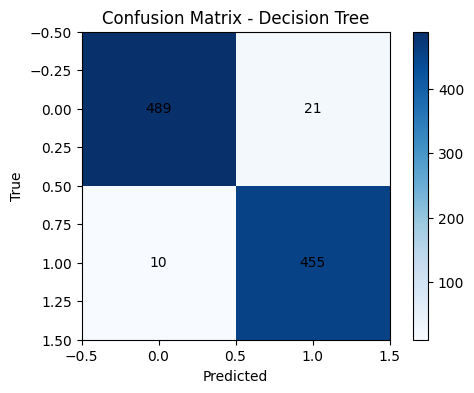

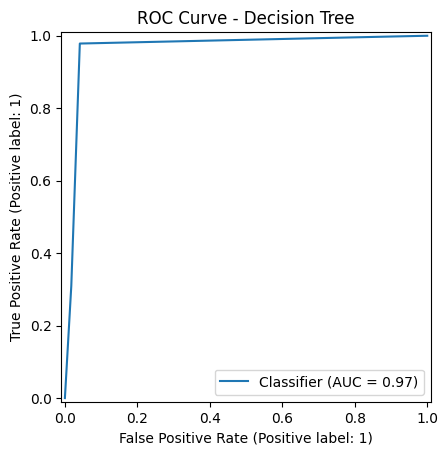

Starting training for Logistic Regression...
Starting hyperparameter tuning for Logistic Regression...
Completed hyperparameter tuning for Logistic Regression.
Logistic Regression training completed.
Starting prediction for Logistic Regression...
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       510
           1       0.97      0.99      0.98       465

    accuracy                           0.98       975
   macro avg       0.98      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975

accuracy: 0.9805128205128205
balanced_accuracy: 0.9810879190385832
precision: 0.9808786416600667
recall: 0.9805128205128205
f1: 0.9805213574316598
roc_auc: 0.9972717689226227
Training Time (s): 120.1038510799408
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


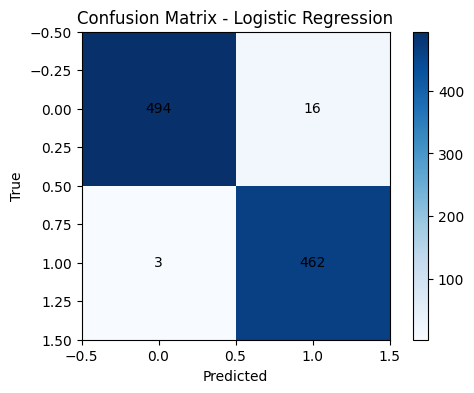

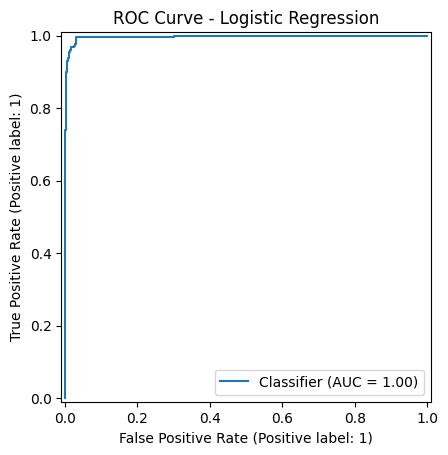

Starting training for Random Forest...
Starting hyperparameter tuning for Random Forest...


In [ ]:
metrics_df_sample_chi = main(X_train_merge_chi, X_test_merge_chi, label_column="sample_type")

In [13]:
# Libraries for the pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Preprocessing step to clean and prepare the data
def preprocess_data(X_train_merge, X_test_merge, label_column, is_multiclass=False):
    X_train = X_train_merge.drop(columns=['sample_id', 'sample_type', 'family_label', 'type_label'])
    y_train = X_train_merge[label_column].to_numpy()

    X_test = X_test_merge.drop(columns=['sample_id', 'sample_type', 'family_label', 'type_label'])
    y_test = X_test_merge[label_column].to_numpy()

    return X_train, y_train, X_test, y_test, None

# Retrieve list of models to train depending on classification type
def get_models(is_multiclass):
    common_params = {'n_jobs': 2}
    return [
        (RandomForestClassifier(verbose=0), "Random Forest"),
        (ExtraTreesClassifier(verbose=0, **common_params), "Extra Trees")
    ]

# Define hyperparameter search grids for each model
def get_hyperparameter_grid(model_name, is_multiclass):
    if model_name == "Random Forest":
        return {
            'n_estimators': [50, 100],
            'max_depth': [10, 20],
            'min_samples_split': [2]
        }
    elif model_name == "Extra Trees":
        return {
            'n_estimators': [50, 100],
            'max_depth': [10, 20],
            'min_samples_split': [2]
        }
    else:
        return {}

# Function to train and evaluate a single model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, is_multiclass):
    print(f"Starting training for {model_name}...")

    param_grid = get_hyperparameter_grid(model_name, is_multiclass)
    if param_grid:
        print(f"Starting hyperparameter tuning for {model_name}...")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='f1_weighted' if is_multiclass else 'roc_auc',
            cv=3, n_jobs=2, verbose=0
        )
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Completed hyperparameter tuning for {model_name}.")
    else:
        print(f"Training {model_name} without hyperparameter tuning...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        best_model = model
        best_params = {}

    print(f"{model_name} training completed.")
    training_time = end_time - start_time

    print(f"Starting prediction for {model_name}...")
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

    if is_multiclass and y_prob is not None:
        y_prob_aligned = np.zeros((y_prob.shape[0], len(np.unique(np.concatenate((y_train, y_test))))))
        for i, cls in enumerate(np.unique(y_train)):
            y_prob_aligned[:, cls] = y_prob[:, i]
        y_prob = y_prob_aligned

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    if is_multiclass and y_prob is not None:
        try:
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
        except ValueError:
            roc_auc = None
    elif y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        roc_auc = None

    print(f"Classification Report - {model_name}:\n{classification_report(y_test, y_pred)}")
    print("accuracy:", accuracy)
    print("balanced_accuracy:", balanced_accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1:", f1)
    print("roc_auc:", roc_auc)
    print("Training Time (s):", training_time)
    print("Best Hyperparameters:", best_params)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]}", ha="center", va="center", color="black")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    if y_prob is not None and not is_multiclass:
        RocCurveDisplay.from_predictions(y_test, y_prob[:, 1])
        plt.title(f"ROC Curve - {model_name}")
        plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Training Time (s)": training_time,
        "Best Hyperparameters": best_params
    }

# Function to iterate over all models
def train_and_evaluate_models(X_train, y_train, X_test, y_test, label_column):
    is_multiclass = label_column in ["type_label", "family_label"]
    models = get_models(is_multiclass)
    metrics_list = []

    for model, name in models:
        print("="*60)
        metrics = evaluate_model(model, X_train, y_train, X_test, y_test, name, is_multiclass)
        metrics_list.append(metrics)

    metrics_df = pd.DataFrame(metrics_list).round(4)
    print("Metrics DataFrame:")
    display(metrics_df)
    if is_multiclass:
        metrics_df['Label Mapping'] = str(dict(enumerate(np.unique(y_train))))
    metrics_df['Best Hyperparameters'] = metrics_df['Best Hyperparameters'].apply(lambda x: str(x))
    return metrics_df

# Main function to run the pipeline
def main(X_train_merge, X_test_merge, label_column):
    print("Starting preprocessing...")
    is_multiclass = label_column in ["type_label", "family_label"]

    X_train, y_train, X_test, y_test, label_encoder = preprocess_data(
        X_train_merge, X_test_merge, label_column, is_multiclass
    )

    print("Preprocessing complete. Beginning model training and evaluation...")
    metrics_df = train_and_evaluate_models(X_train, y_train, X_test, y_test, label_column)
    print("Model Performance Metrics:")
    display(metrics_df)
    return metrics_df


/mnt/storage/faithfulco/python_packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Starting preprocessing...
Preprocessing complete. Beginning model training and evaluation...
Starting training for Random Forest...
Starting hyperparameter tuning for Random Forest...
Completed hyperparameter tuning for Random Forest.
Random Forest training completed.
Starting prediction for Random Forest...
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       510
           1       0.89      0.99      0.94       465

    accuracy                           0.94       975
   macro avg       0.94      0.94      0.94       975
weighted avg       0.94      0.94      0.94       975

accuracy: 0.9353846153846154
balanced_accuracy: 0.9378557874762808
precision: 0.9412890955198646
recall: 0.9353846153846154
f1: 0.9353472271396576
roc_auc: 0.9913767657600674
Training Time (s): 968.3201479911804
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


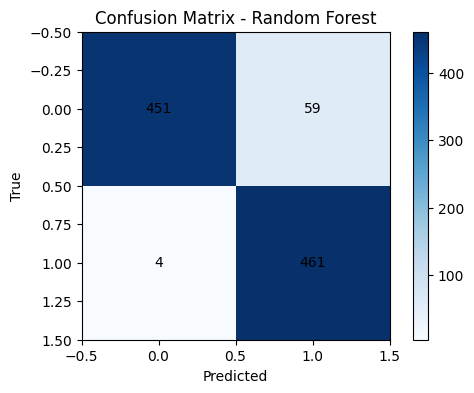

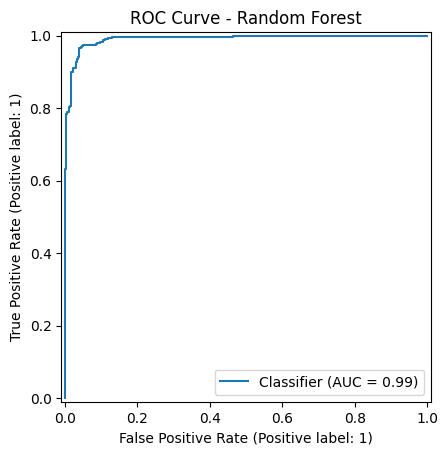

Starting training for Extra Trees...
Starting hyperparameter tuning for Extra Trees...
Completed hyperparameter tuning for Extra Trees.
Extra Trees training completed.
Starting prediction for Extra Trees...
Classification Report - Extra Trees:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       510
           1       0.89      0.99      0.94       465

    accuracy                           0.94       975
   macro avg       0.94      0.94      0.94       975
weighted avg       0.94      0.94      0.94       975

accuracy: 0.9353846153846154
balanced_accuracy: 0.9379506641366224
precision: 0.9417171699427922
recall: 0.9353846153846154
f1: 0.9353381158511402
roc_auc: 0.9936812144212525
Training Time (s): 833.3418662548065
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


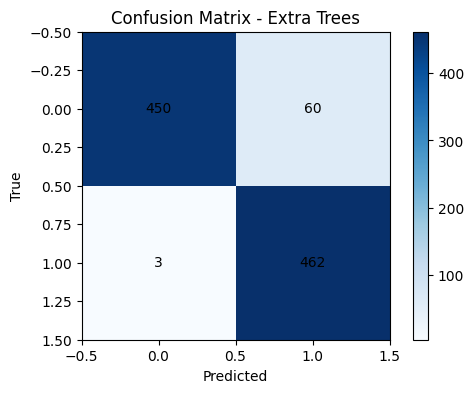

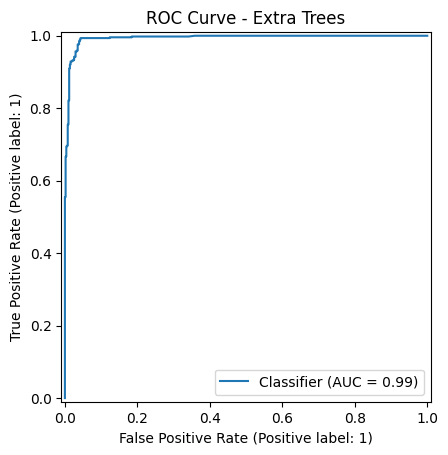

Metrics DataFrame:


,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time (s),Best Hyperparameters
0,Random Forest,0.9354,0.9379,0.9413,0.9354,0.9353,0.9914,968.3201,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
1,Extra Trees,0.9354,0.9380,0.9417,0.9354,0.9353,0.9937,833.3419,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."


Model Performance Metrics:


,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time (s),Best Hyperparameters
0,Random Forest,0.9354,0.9379,0.9413,0.9354,0.9353,0.9914,968.3201,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
1,Extra Trees,0.9354,0.9380,0.9417,0.9354,0.9353,0.9937,833.3419,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."


In [14]:
metrics_df_sample_chi = main(X_train_merge_chi, X_test_merge_chi, label_column="sample_type")

In [ ]:
display(metrics_df_sample_chi)
metrics_df_sample_chi.to_csv('outputs/1_baseline/bin_class_stage1_CHI.csv', index=False)